In [10]:
# Import necessary libraries

import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# load and split diabetes dataset

# from : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

# Load the diabetes dataset from scikit-learn
diabetes = load_diabetes()

# Create DataFrame for features and Series for target variable
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='target')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)


In [12]:
# 2. Implementation and Experimentation 
# ○ Implement Random Forest Regressor using Python and scikit-learn, ensuring rigorous experimental design.
# ○ Experiment with various hyperparameters, including tree depth, number of estimators, and feature selection methods.
# ○ Conduct a thorough analysis of the impact of hyperparameters on model performance through systematic experimentation.

In [13]:
# Initialize a Random Forest Regressor
rf = RandomForestRegressor()

# Define hyperparameter grid for Randomized Search CV
param_grid = {
    'n_estimators': [50, 100],   # Number of trees in the forest
    'max_depth': [10, 20], # Maximum depth of each tree
    'max_features': ['sqrt', 'log2'], # Number of features to consider when looking for the best split
}

# Perform Randomized Search CV to find best hyperparameters
random_search = RandomizedSearchCV(estimator=rf, 
                                   param_distributions=param_grid,
                                   n_iter=8, cv=5, 
                                   verbose=2, random_state=42, 
                                   n_jobs=-1)

random_search.fit(X_train, y_train)

# Print the best parameters found by Randomized Search CV
print("Best parameters found:", random_search.best_params_)

# Assign the best model found to a variable
best_model = random_search.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found: {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 20}


In [14]:
# 3. Evaluation and Interpretation
# ○ Evaluate the performance of Random Forest Regressor using appropriate
# regression evaluation metrics such as Mean Squared Error (MSE), R-squared,
# and Mean Absolute Error (MAE).

In [16]:
def evaluate_performance(model, X_train, y_train, X_test, y_test):
    """
    Evaluate the performance of a regression model on training and testing sets.
    
    Parameters:
        model: Regression model to evaluate.
        X_train: Features of the training set.
        y_train: Target variable of the training set.
        X_test: Features of the testing set.
        y_test: Target variable of the testing set.
        
    Returns:
        result_str: String indicating the performance metrics.
        result_list: List containing the performance metrics.
    """
    # Calculate R-squared for training and testing sets
    train_rsq = model.score(X_train, y_train)
    test_rsq = model.score(X_test, y_test)
    
    # Calculate root mean squared error (RMSE) for training and testing sets
    train_rmse = mean_squared_error(y_train, model.predict(X_train), squared=False)
    test_rmse = mean_squared_error(y_test, model.predict(X_test), squared=False)
    
    # Format and return performance metrics
    return "train rsq, val rsq, train rmse, val rmse", [train_rsq, test_rsq, train_rmse, test_rmse]

# Evaluate the performance of the random forest regressor
result_str, result_list = evaluate_performance(best_model, X_train, y_train, X_test, y_test)

# Print the performance metrics
print(result_str)
print(result_list)


train rsq, val rsq, train rmse, val rmse
[0.9222144907685492, 0.45257591518312523, 21.401794368039802, 57.75865017175281]


In [17]:
# 4. Comparative Analysis
# ○ Conduct a comparative analysis of Random Forest Regressor with other regression models, such as Linear Regression, Gradient Boosting Regressor.
# ○ Critically evaluate the advantages and limitations of each model, considering factors like interpretability, computational complexity, and scalability.

In [18]:
# Initialize Linear Regression and Gradient Boosting Regressor models
linear_regressor = LinearRegression()
gb_regressor = GradientBoostingRegressor()

# Train and evaluate the performance of each model
for model in [best_model, linear_regressor, gb_regressor]:
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Evaluate the performance of the model
    result = evaluate_performance(model, X_train, y_train, X_test, y_test)
    
    # Print the model performance
    print(f"{model.__class__.__name__} Performance: {result}")


RandomForestRegressor Performance: ('train rsq, val rsq, train rmse, val rmse', [0.9213917136381568, 0.4530838332743059, 21.514685491187237, 57.73184876476547])
LinearRegression Performance: ('train rsq, val rsq, train rmse, val rmse', [0.5143626606840677, 0.5174841876451617, 53.47574859664936, 54.22641078328426])
GradientBoostingRegressor Performance: ('train rsq, val rsq, train rmse, val rmse', [0.8278727864595579, 0.4024247836444732, 31.836521238474205, 60.34640086710071])


In [ ]:
# 5. Feature Importance and Interpretability
# ○ Perform feature importance analysis to identify the most influential features in the
# Random Forest Regressor model.
# ○ Critically assess the interpretability of the model and the reliability of feature
# importance scores in guiding decision-making processes.

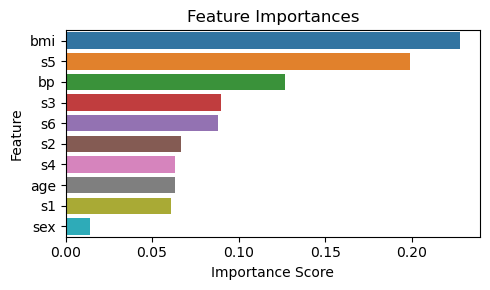

In [20]:
# Create a DataFrame to store feature importances from the random forest regressor
feat_imps = pd.DataFrame(best_model.feature_importances_, index=X.columns,
                         columns=['Importance Score']).sort_values('Importance Score', ascending=False)

# Reset index and rename columns
feat_imps = feat_imps.reset_index()
feat_imps.columns = ["Feature", "Importance Score"]

# Plot a bar chart to visualize feature importances
plt.figure(figsize=(5, 3))
sns.barplot(x="Importance Score", y="Feature", data=feat_imps, orient="h")
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
